# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [ ]:
# YOUR CODE HERE

# Loading the data with pandas 
wine_data = pd.read_csv("white_wine.csv", sep=";")

# Showing a random sample of 10 entries
wine_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
766,6.7,0.500,0.63,13.40,0.078,81.0,238.0,0.998800,3.08,0.44,9.200000,5
4548,6.4,0.460,0.22,14.70,0.047,51.0,183.0,0.998275,3.39,0.60,10.500000,5
4364,6.4,0.290,0.21,9.65,0.041,36.0,119.0,0.993340,2.99,0.34,10.933333,6
1666,7.8,0.445,0.56,1.00,0.040,8.0,84.0,0.993800,3.25,0.43,10.800000,5
3884,6.0,0.280,0.24,17.80,0.047,42.0,111.0,0.998960,3.10,0.45,8.900000,6
430,6.8,0.290,0.50,13.30,0.053,48.0,194.0,0.997400,3.09,0.45,9.400000,5
1253,7.3,0.250,0.41,1.80,0.037,52.0,165.0,0.991100,3.29,0.39,12.200000,7
2224,8.0,0.450,0.28,10.80,0.051,25.0,157.0,0.995700,3.06,0.47,11.400000,7
3645,5.9,0.180,0.28,5.10,0.039,50.0,139.0,0.991650,3.16,0.44,11.300000,6
2007,5.6,0.180,0.31,1.50,0.038,16.0,84.0,0.992400,3.34,0.58,10.100000,6


In [5]:
# Basic stats for a baseline
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
# Checking for missing values and Dtypes for each column
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [7]:
# YOUR CODE HERE

# Getting a list of the columns in the dataset
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Explantion of Columns

**Fixed Acidity** : Non-volatile acids that are naturally present in white wine and do NOT evaporate easily hence the name "fixed acidity". Examples of these acids include tartaric and malic acid. Measured in grams per liter (g/L) with a typical range from 4.5 to 8.5 g/L. White wines are typically on the higher end of the scale. Important for tasting notes since wines with a higher fixed acidity are more tart. 

**Volatile Acidity**: Volatile acidity (VA) in small amounts is natural in the wine making process; however, if the wine is exposed to excessive amounts of oxygen then VA amounts will increase. For white wines the max amount of VA legally allowed is 1.2 grams per liter (g/L). Typical white wines have a value of 0.40 g/L. Very important to measure the quality of wine, high level of VA can lead to the wine smelling like vinegar or nail polish.

**Citric Acid**: Measured in grams per liter (g/L) with a typical range of 0.04 - 0.7 g/L. Added to bring a fresh and crisp feeling to white wine. To much citric acid can cause negative impacts by creating a environment for microbial growth. 

**Residual Sugar**: Measured in grams per liter (g/L), with a range from 1 g/L to greater than 45 g/L. Less residual sugar means a more dry wine while the opposite is an increase in sweetness of the wine. Most white wines are going to fall in the range of 1 - 11 g/L. Residual sugars occur due to the natural process of fermentation. Contributes to the sweetness of the wine. 

**Chlorides**: The amount of NaCl or salt found in the wine. To much salt is undesirable because it can lead to an unpleasant taste. Measured in grams per liter (g/L), with if typical range in white wine varying greatly from 0.06 g/L to 0.35 g/L. Most white wines will be around 0.04 g/L.

**Free Sulfur Dioxide**: Naturally occurring and added during the wine making process. Used to prevent oxidation in white wines. Measured in milligrams per liter (mg/L) with a typical range of anywhere from 0 - 50 mg/L in white wines. This column is directly correlated to pH. As pH rises or falls so does the content of free sulfur dioxides. 

**Total Sulfur Dioxide**: The total of both "free" and "bound" sulfur dioxide. Bound sulfur dioxide is no longer available to prevent oxidation. Hight amounts of "bound" sulfur dioxides can indicate spoilage. Measured in milligrams per liter (mg/L), with a typical range of 100-200 mg/L. The United States legal limit is 350 mg/L.

**Density**: Measured in grams per milliliter (g/mL), and ranges from 0.991 to 1.014 g/mL in white wine. Provides information about alcohol content and residual sugar levels. For tasting notes density is related to how the wine feels in the tasters mouth. 

**pH**: Range of pH for white wine is typically 3.0 - 3.4. High acidity is needed to prevent the growth of microbes. pH gives white wine the crisp and fresh flavor.

**Sulphates**: Used as a preservative in the wine making process. They are naturally occurring and typically added during the wine making process. High amounts of sulphates are linked to a bitter taste in wine. The typical range is 0.05 g/L - 0.350 g/L. 

**Alcohol**: Percentage of alcohol in the white wine. Alcohol percentage contributes to the taste of the wine. The typical alcohol percentage in white wine is 8% - 14.5%. (Could be interesting to look at correlations between residual sugar and alcohol content).

**Quality (target)**: Rating of the white wine. The wine rating is on a scale of 0-10; however, the minimum and maximum values actually observed were 3 and 9 respectively.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

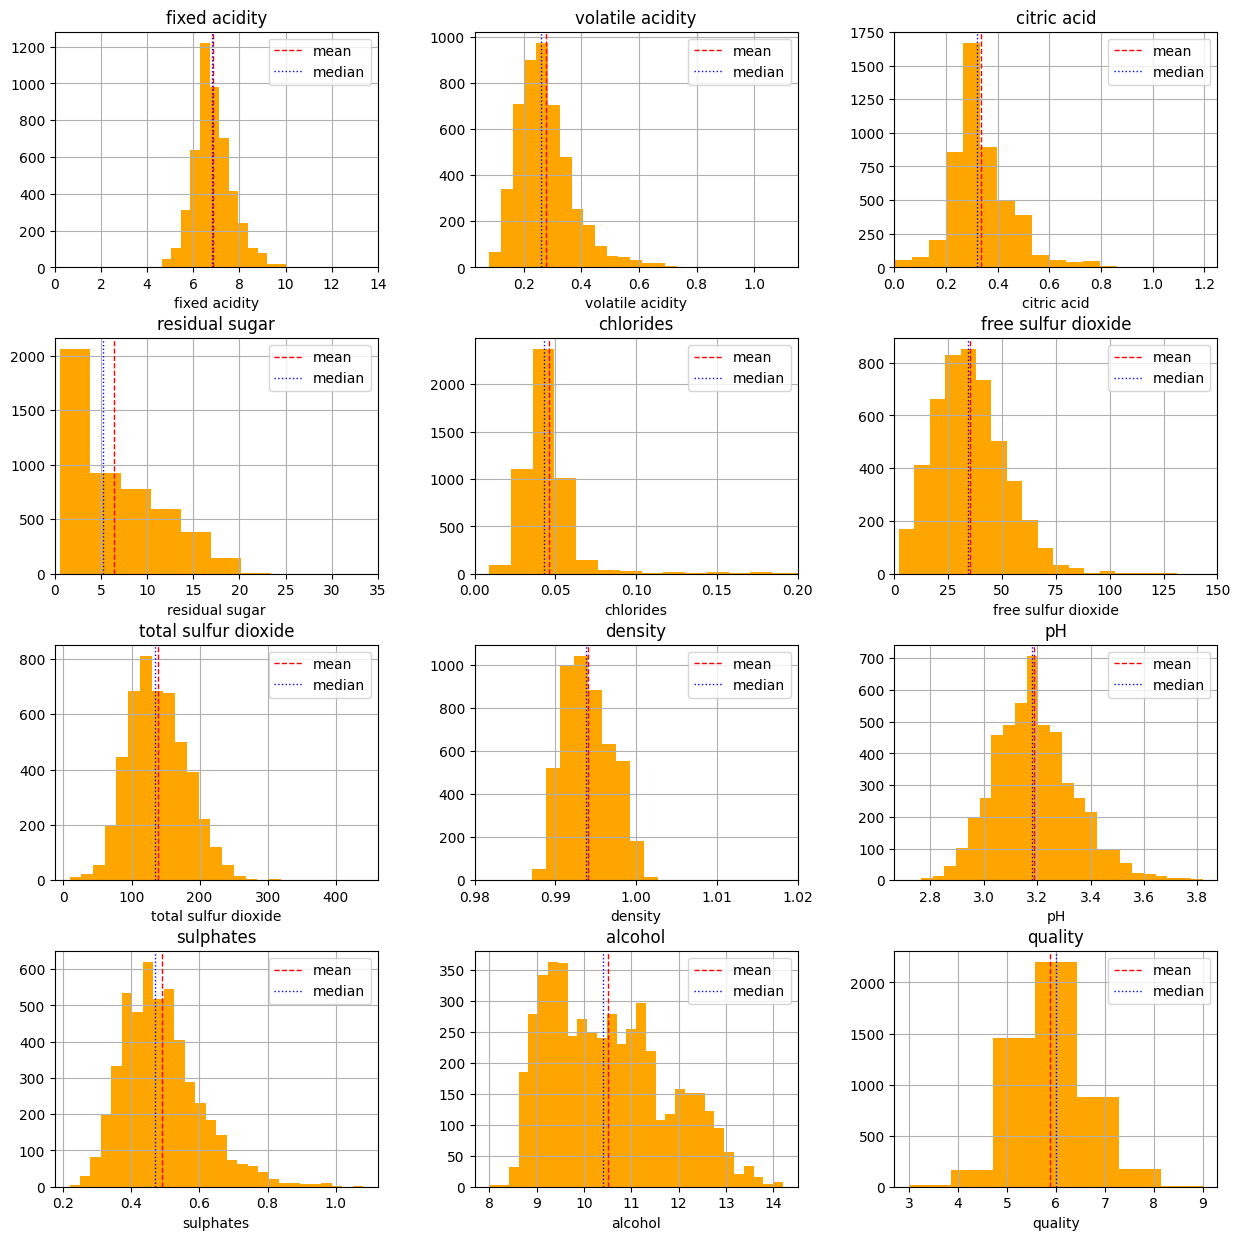

In [8]:
# function to replot axes that did not populate as wanted 
def replot(ax, series, *, bins=25, xlabel=None, title=None, grid=None, mean=None, median=None):
    ax.clear()
    ax.hist(series, bins=bins, color="orange")

    if xlabel is not None:
        ax.set_xlabel(xlabel)

    if title is not None:
        ax.set_title(title)

    if grid is not None:
        ax.grid(grid)

    if mean is not None:
        ax.axvline(mean, color="red", linewidth=2)

    if median is not None:
        ax.axvline(median, color="blue", linewidth=2)

# create basic histogram plot of every columns and create a map to each axes
axes_2 = wine_data.hist(figsize=(15,15), bins=25, color="orange")
axes_flat = axes_2.flatten()
map_to_ax = {col: ax for col, ax in zip(wine_data.columns, axes_flat)}

# storing the columns that need replotting in a list
replot_columns = ["residual sugar", "free sulfur dioxide", "density", "alcohol", "sulphates", "quality"]

# storing the values for the bins of each column being replotted
replot_bins = [20, 40, 30, 30, 28, 7]

# replotting every column in the replot_columns list with its respective bin size
for col, n_bin in zip(replot_columns, replot_bins):
    replot(map_to_ax[col], wine_data[col], title=col, grid=True, bins=n_bin)

# storing columns that need the xlim adjusted in a list
redo_xlim_columns = ["citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "density", "fixed acidity"]

# storing the xlim values for each column in redo_xlim_columns
redo_xlim_values = [(0.0, 1.25), (0,35), (0.0, 0.20), (0,150), (0.98,1.02), (0,14)]

# redoing the xlim for every column in redo_xlim_columns with its respective xlim values
for col, xlim in zip(redo_xlim_columns, redo_xlim_values):
    map_to_ax[col].set_xlim(xlim)

# adding x axis label for further clarification
for col in wine_data.columns:
    map_to_ax[col].set_xlabel(col)

# adding mean and median lines for every graph 
for col in wine_data.columns:

    # cacluating mean and median of column
    col_mean = wine_data[col].mean()
    col_median = wine_data[col].median()

    # plotting mean and median of column
    line_mean = map_to_ax[col].axvline(col_mean, color="red", linestyle="--", linewidth=1)
    line_median = map_to_ax[col].axvline(col_median, color="blue", linestyle="dotted", linewidth=1)

    # adding legend to graph
    map_to_ax[col].legend([line_mean, line_median],["mean", "median"])


## Distribution Type

Without zooming in on the x-axis to hide outliers, every distribution, except for the quality variable, showed right skewness. This happens because outliers heavily impact the skew of a graph by pulling the mean towards the extreme values and visually stretching the x-axis. For this project, only the most extreme outliers in each feature (when present) were hidden to provide a clearer picture of the typical values. These graphs are shown above.


### Graphs with x-axis adjusted

**Fixed Acidity** : Normal 

**Volatile Acidity**: Right Skewed

**Citric Acid**: Right Skewed

**Residual Sugar**: Right Skewed

**Chlorides**: Right Skewed

**Free Sulfur Dioxide**: Right Skewed

**Total Sulfur Dioxide**: Right Skewed

**Density**: Normal

**pH**: Normal

**Sulphates**: Right Skewed 

**Alcohol**: Right Skewed

**Quality (target)**: Left Skewed

YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

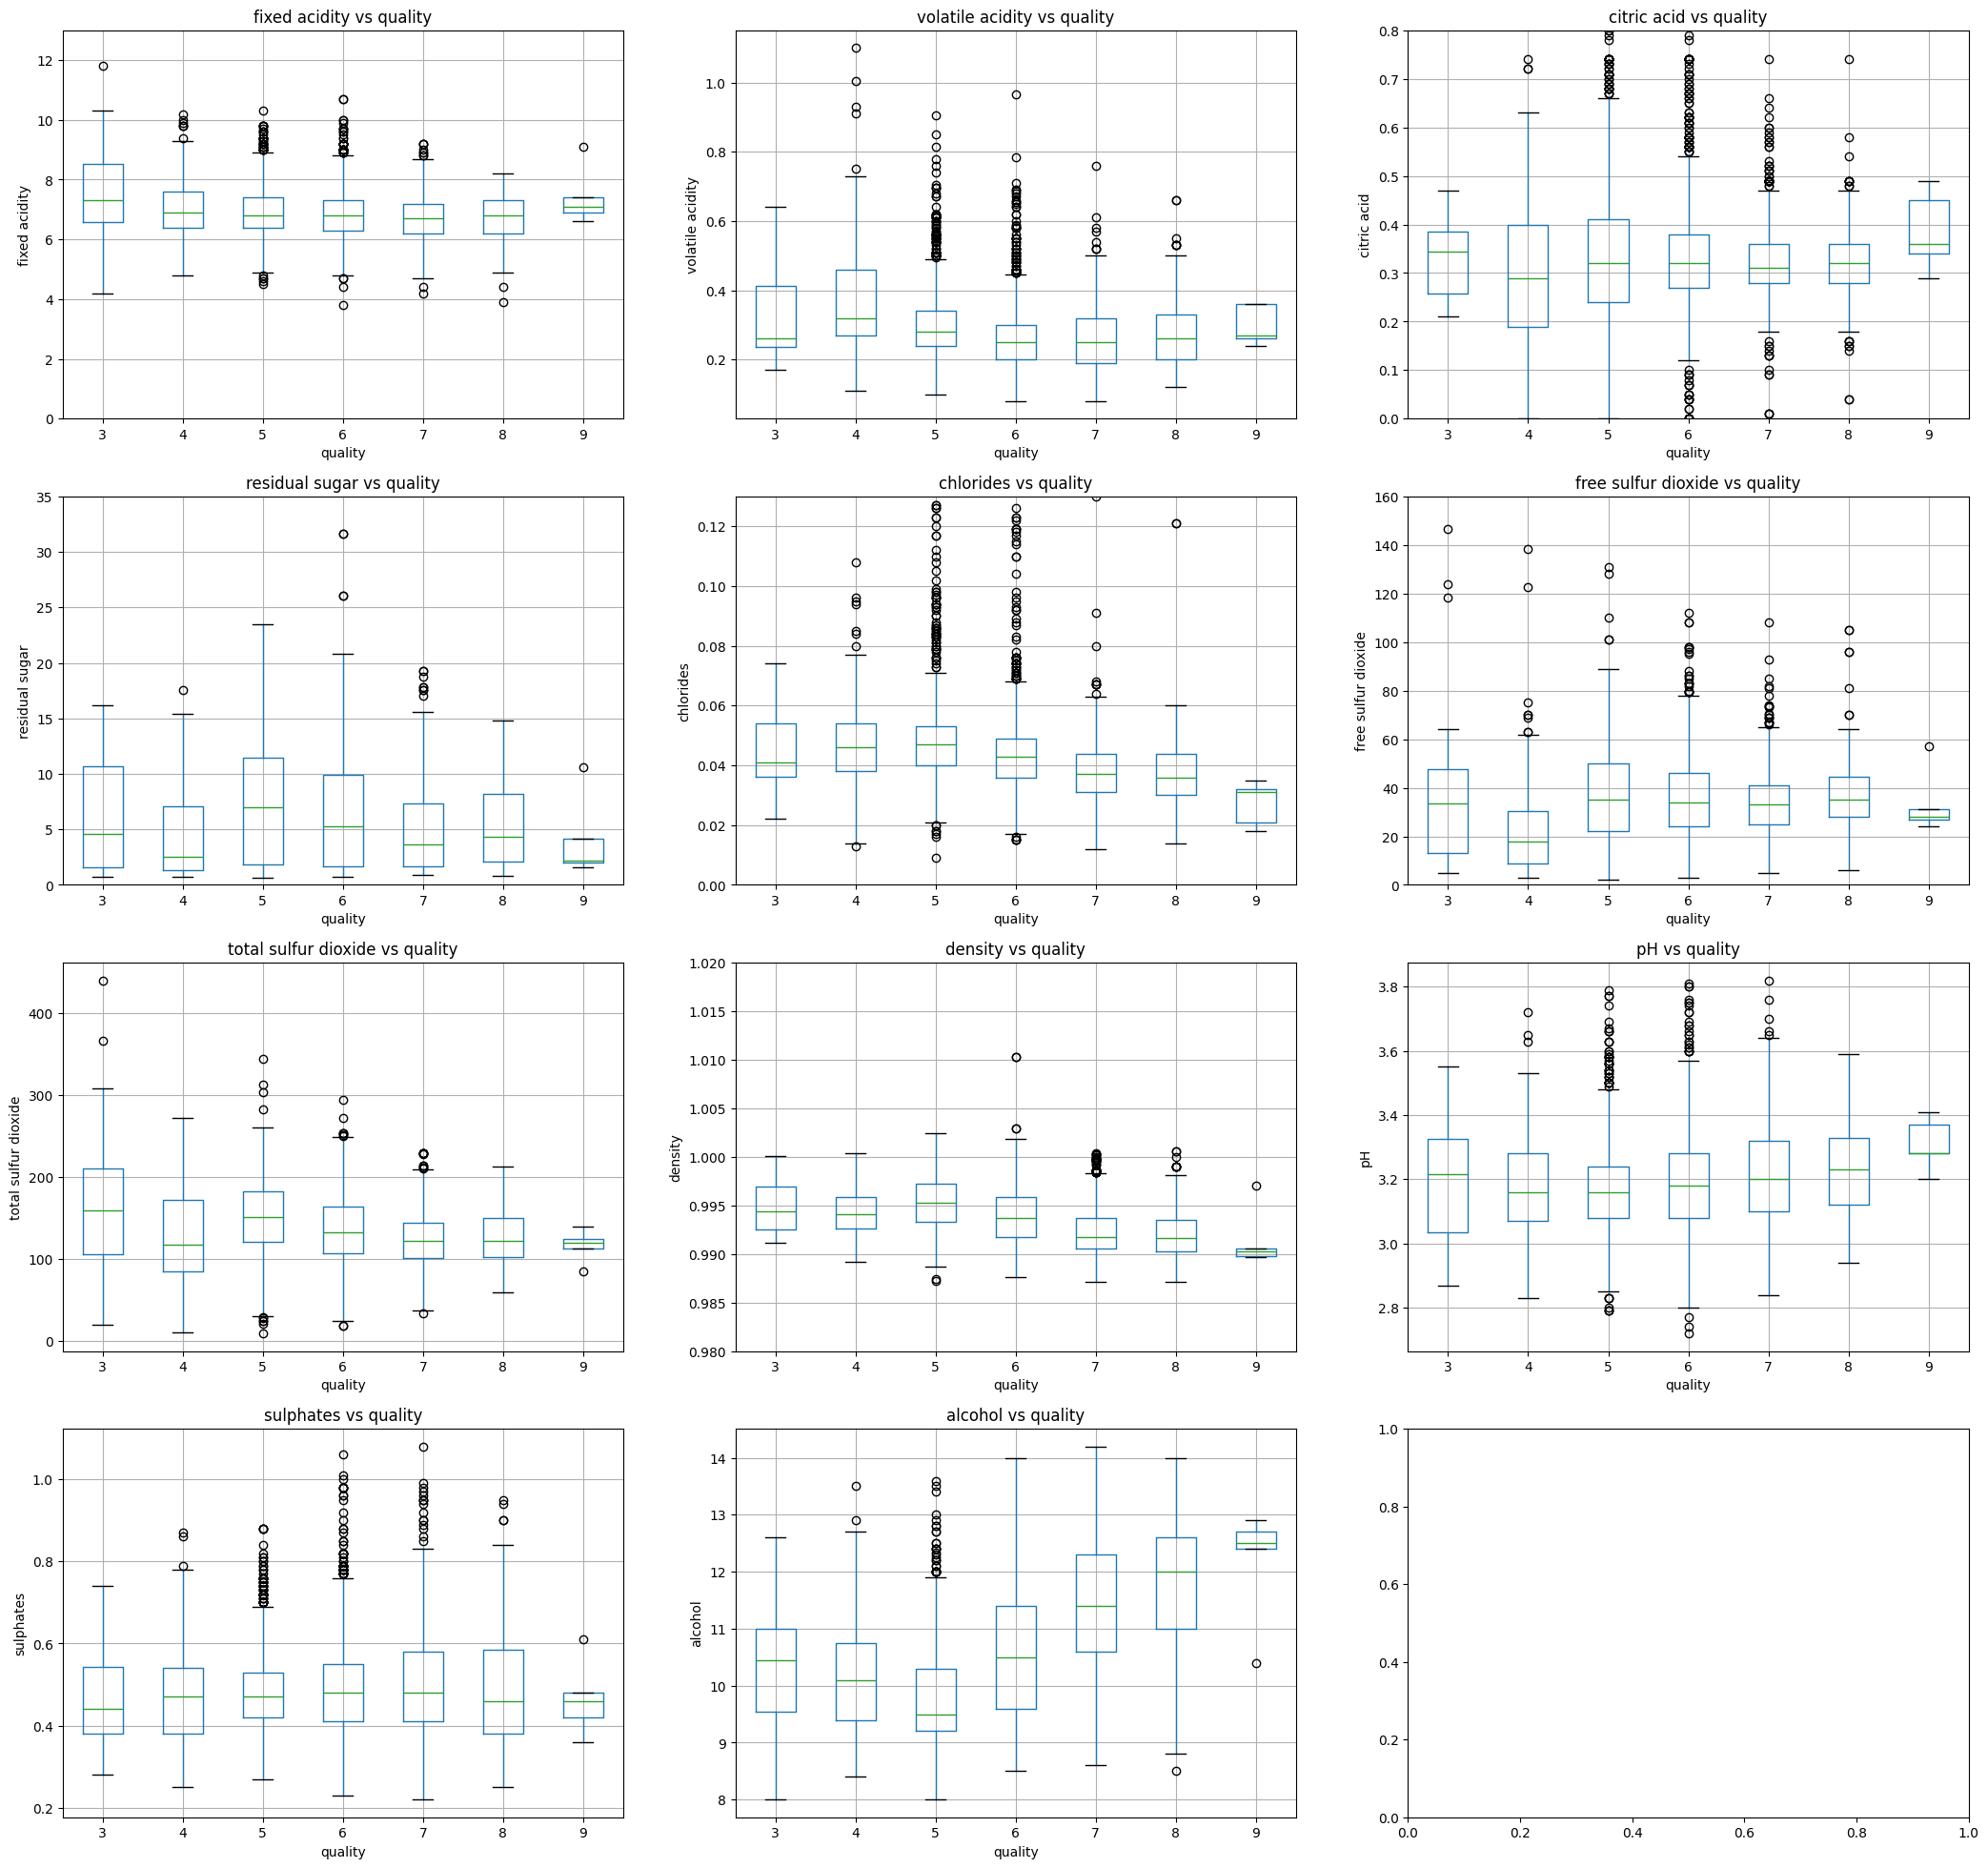

In [9]:
# YOUR CODE HERE

# grabbing quality wine series and storing it in the value X
X = wine_data["quality"]

# function used to plot box plots
def box_plot(ax, x, y, *, title=None, ylabel=None, ylim=None):
    df = pd.DataFrame({"x": x, "y": y})
    df.boxplot(column='y', by='x', ax=ax)
    ax.set_xlabel("quality")
    if title is not None:
        ax.set_title(title)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.figure.suptitle("")

# creating a figure and subplots for all cols and mapping them to their respective axes
fig, axes = plt.subplots(4,3, figsize=(25,25))
in_out_axes = axes.flatten()
map_to_in_out_axes = {col: ax for col, ax in zip(wine_data.drop(columns=["quality"], axis=1).columns, in_out_axes)}

# actually plotting graphs
for col in wine_data.drop(columns=["quality"]).columns:
    box_plot(map_to_in_out_axes[col], X, wine_data[col], title= f"{col} vs quality", ylabel=col)

# fixing ylims on certain graphs to exclude outliers that make the graphs hard to read
redo_ylim_columns = ["fixed acidity", "residual sugar", "free sulfur dioxide", "density", "chlorides", "citric acid"]
redo_ylim_values = [(0,13), (0,35), (0,160), (0.98, 1.02), (0.0, 0.13), (0.0, 0.8)]

# plotting ylim adjustments
for col, ylim in zip(redo_ylim_columns, redo_ylim_values):
    map_to_in_out_axes[col].set_ylim(ylim)


## Dependency of Features on the Target Variable (Quality)

**Fixed Acidity**: Independent. There is no clear trend in the data. Most of the values stay centered around 7, and the boxes heavily overlap. This shows that changes in fixed acidity do not meaningfully affect the quality of the wine. 

**Volatile Acidity**: Independent. There is no clear trend in the data. Most of the values stay centered around 0.3. This shows that changes in volatile acidity do not meaningfully affect the quality of the wine. 

**Citric Acid**: Independent. There is no clear trend in the data. Most of the values stay centered around 0.35, and the boxes heavily overlap. This shows that changes in citric acid content do not meaningfully affect the quality of the wine. 

**Residual Sugar**: Independent. There is no clear trend in the data. Although quality wines for groups 5-7 do show a slight downward shift, the pattern does not hold for across all quality levels. There are low quality wines with low residual sugar and high quality wines with high residual sugar. The boxplots also heavily overlap across groups further proving residual sugars independence in the dataset. 

**Chlorides**: Dependent. There is a downward trend in the data with a slight inconsistency for group 3. Every other group has a lower median than the previous showing that as the amount of chlorides in the wine decreases the quality of the wine increases.

**Free Sulfur Dioxide**: Independent. There is no clear trend in the data. Most of the values stay centered around 35 mg/L with a slight dip for the category 4 quality wines. 

**Total Sulfur Dioxide**: Independent. There is no clear trend in the data.  Although quality wines for groups 5-7 do show a slight downward shift, the pattern does not hold for across all quality levels. There are low quality wines such as group 4 with the median total sulfur dioxide content as the high quality wines of group 8.

**Density**: Dependent. There is a downward trend in the data, with a slight inconsistency for group 4. Every other group has a lower median than the previous showing that as the density of the wine decreases the quality of the wine increases.

**pH**: Dependent. There is a upward trend in the data with a slight inconsistency for group 3. Every other group has a higher median than the previous showing that as pH of the wine increases the quality of the wine increases.

**Sulphates**: Independent. There is no clear trend in the data. All of the median values center around 0.45g/L. There is also heavy overlap between the boxplots, further proving sulphates independence in the dataset.

**Alcohol**: Dependent. There is a clear trend in the data with slight inconsistencies for groups 3 and 4. Every other group (5-9), shows a clear and strong upward trend indicating that as alcohol content increases so does the quality of the wine. 


YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [10]:
# YOUR CODE HERE

# storing the input column for the model in input_cols
input_cols = wine_data.drop(columns=["quality"])

# storing the target variable for the model in target
target = wine_data["quality"]

# building the model and storing its predictions in predictions variable
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(input_cols, target)
predictions = pd.Series(linear_model.predict(input_cols))

In [11]:
# calculating the mean squared error of the Linear Regression model
mean_squared_error = np.mean((target - predictions)**2)

print(f"Mean Squared Error: {mean_squared_error:.3f}")

Mean Squared Error: 0.563


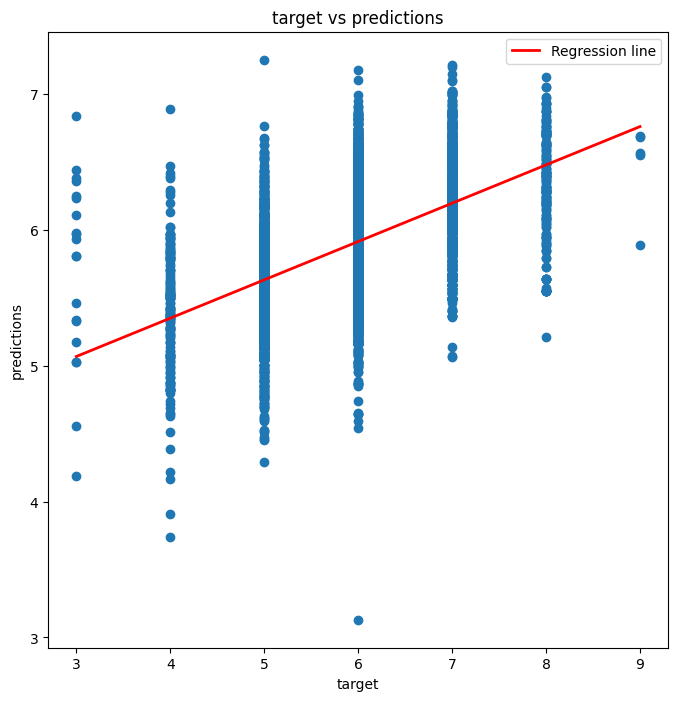

In [12]:
# creating a scatter plot for the actual values and the predicted values from the model
plt.figure(figsize=(8,8))
plt.scatter(target, predictions)
plt.title("target vs predictions")
plt.xlabel("target")
plt.ylabel("predictions")

# adding the regression line from the model to the figure
m, b = np.polyfit(target, predictions, 1)
line_x = np.linspace(target.min(), target.max(), 200)
line_y = m * line_x + b
plt.plot(line_x, line_y, color="red", linewidth=2, label="Regression line")
plt.legend()

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [63]:
# YOUR CODE HERE

# initializing an empty dictionary to be filled in by the for loop below
values={}

# loop that creates a linear model individually for every single column based on the target variable quality
for col in wine_data.drop(columns=["quality"]).columns:
    X = wine_data[[col]]
    y = target

    # building the model
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, y)

    # finding and storing the predictions in col_predictions
    col_predictions = model.predict(X)

    # calculating the mean squared error of the model
    MSE = np.mean((target - col_predictions)**2)

    # updating the values dictionary with the name of the column as the key 
    # and mean squared error of the model as the value
    values[col] = MSE

# prints the column that gives the best model based on the mean squared error
min_item = min(values.items(), key=lambda x: x[1])

print(f"Best linear model based on Mean Squared Error: {min_item[0]} with an MSE score of {min_item[1]:.3f}")


Best linear model based on Mean Squared Error: alcohol with an MSE score of 0.635


### How does this model compare to the model above? 

The full linear regression model from Problem 5 has a mean squared error of 0.563, while the alcohol-only model from Problem 6 has a mean squared error of 0.635. This is a difference of 0.072, indicating that the full model performs better. This demonstrates that using all available features is more valuable than selecting even the best single predictive feature for this dataset.

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

Text(0.5, 1.0, 'residual sugar vs density')

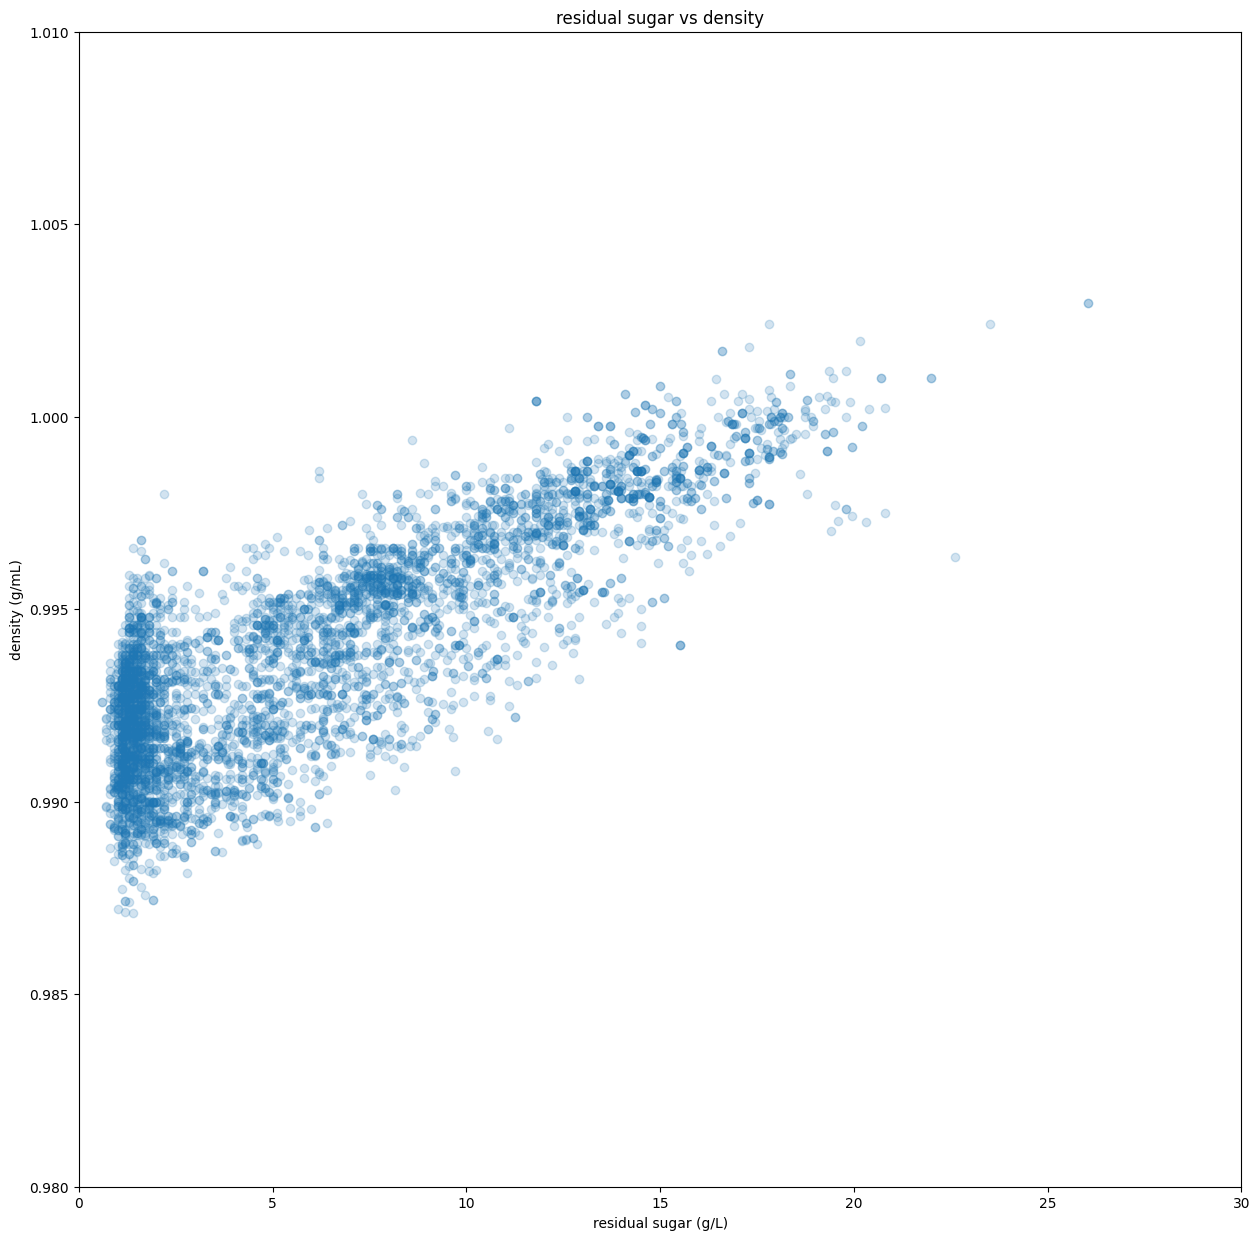

In [14]:
# YOUR CODE HERE

# creating a scatter plot of residual sugar vs density
plt.figure(figsize=(15,15))
plt.scatter(wine_data["residual sugar"], wine_data["density"], alpha=0.2)
plt.ylim(0.98, 1.01)
plt.xlim(0,30)
plt.xlabel("residual sugar (g/L)")
plt.ylabel("density (g/mL)")
plt.title("residual sugar vs density")

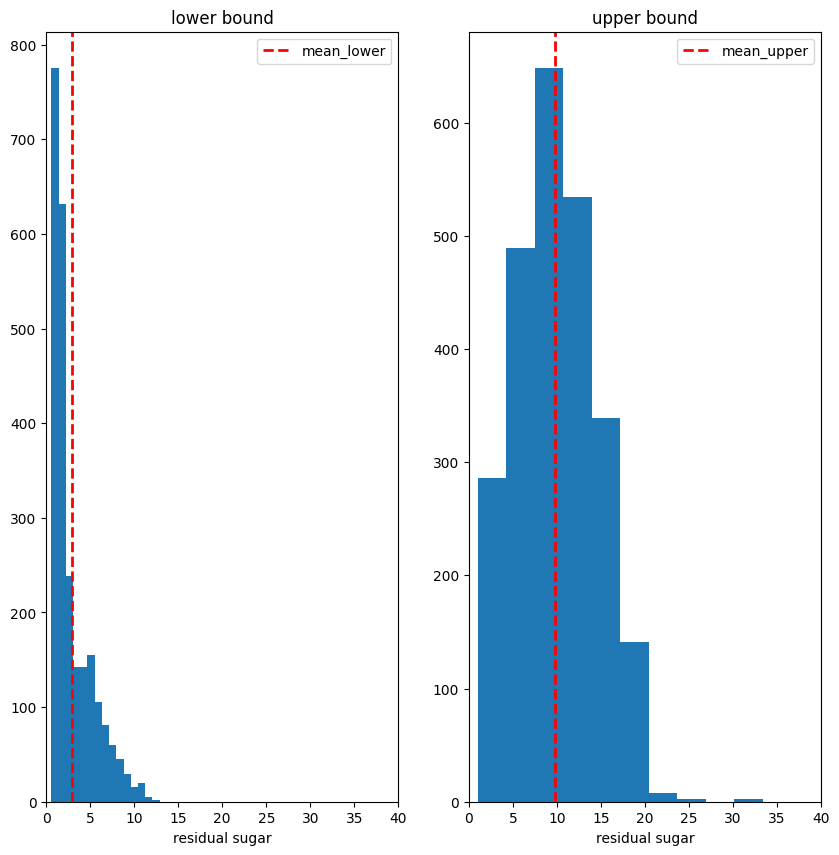

In [15]:
# finding the median of the density column 
median_d = wine_data["density"].median()

# splitting the wine data based on density into the lower half (samples below the median value for density)
# and the upper half (samples above the median value for density)
# returns boolean values
lower_half = wine_data["density"] < median_d
upper_half = wine_data["density"] >= median_d

# creating lower and upper bound dataframes based on the boolean values from lower_half and upper_half
lower_bound = wine_data[lower_half]
upper_bound = wine_data[upper_half]

# finding the means of the lower and upper bound for the residual sugar column
mean_low = lower_bound["residual sugar"].mean()
mean_up = upper_bound["residual sugar"].mean()

# creating a figure with 2 subplots
figs, axs = plt.subplots(1,2, figsize=(10,10))

# creating a histogram for the lower bound of the residual sugar column
axs[0].hist(lower_bound["residual sugar"], bins=15)
axs[0].set_title("lower bound")
axs[0].set_xlabel("residual sugar")
axs[0].set_xlim(0,40)

# adding a mean line to the graph for easy comparison to the upperbound graph
axs[0].axvline(mean_low, color="red", linestyle="--", linewidth=2, label="mean_lower")
axs[0].legend()

# creating a histogram for the upper bound of the residual sugar column
axs[1].hist(upper_bound["residual sugar"], bins=20)
axs[1].set_title("upper bound")
axs[1].set_xlabel("residual sugar")
axs[1].set_xlim(0,40)

# adding a mean line to the graph for easy comparison to the lowerbound graph
axs[1].axvline(mean_up, color="red", linestyle="--", linewidth=2, label="mean_upper")
axs[1].legend()

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [ ]:
#standardizing the data for PCA
standard_input_cols = input_cols / input_cols.std()
standard_input_cols.std()

fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64

In [ ]:
# creating the PCA model, fitting it, and grabbing the components
pca1 = PCA()
pca1.fit(standard_input_cols)
pca1_components = pd.DataFrame(pca1.components_, columns=standard_input_cols.columns)
pca1_components

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.157218,0.005089,0.144050,0.427408,0.212011,0.300334,0.406652,0.511524,-0.128832,0.043379,-0.437238
1,0.587558,-0.051728,0.345295,-0.008749,0.008800,-0.290355,-0.244032,-0.006297,-0.581344,-0.222695,0.035569
2,-0.121368,0.590971,-0.504397,0.214320,0.102367,-0.279410,-0.124375,0.129203,-0.126672,-0.433244,-0.105903
3,0.018584,0.274115,0.148514,-0.273765,0.710712,-0.305585,-0.060456,-0.022061,0.097753,0.442060,-0.141079
4,0.251048,0.642617,0.053905,0.011391,-0.328628,0.176912,0.293010,-0.084588,-0.119826,0.400585,0.337419
5,-0.103531,0.122338,0.132097,-0.289447,0.395821,0.494494,0.276320,-0.327651,-0.193341,-0.481039,0.139284
6,-0.197849,0.269355,0.705481,0.212760,-0.079484,-0.166779,-0.067730,0.110385,0.427313,-0.308562,0.128922
7,0.588355,0.028373,-0.152287,-0.388186,-0.100151,-0.081799,0.247314,0.069026,0.533881,-0.270394,-0.195859
8,0.330523,-0.145910,-0.202011,0.408969,0.393535,0.144073,-0.154540,0.087888,0.261298,-0.011698,0.621091
9,-0.131705,-0.223722,-0.037351,0.094468,0.053374,-0.567451,0.709120,-0.068374,-0.110733,-0.057708,0.272609


In [ ]:
# grabbing the variance explained by each principal component
pca1_var = pca1.explained_variance_
pca1_var

array([3.22225389, 1.57523993, 1.22167134, 1.01852235, 0.97333458,
       0.93874151, 0.72659802, 0.59935848, 0.41414367, 0.28948714,
       0.02064909])

In [58]:
# grabbing the total amount of var explained by all principal components
pca1_var_total = pca1_var.sum()
print(f"The total variance explained by the principal components: {pca1_var_total:.2f}")

The total variance explained by the principal components: 11.00


In [59]:
# grabbing the variance explained by the first 5 principal components
var_first_half = pca1_var[0:5].sum()
print(f"The variance explained by the first half (5) of the principal components: {var_first_half:.2f}")

The variance explained by the first half (5) of the principal components: 8.01


In [60]:
# calculating the percentage of variance explained by the first 5 principal components
percent_var_explained_fh = (var_first_half / pca1_var_total) * 100
print(f"Percentage of variance explained by the first half (5) of the principal components: {percent_var_explained_fh:.2f}%")

Percentage of variance explained by the first half (5) of the principal components: 72.83%


In [ ]:
# creating the pca coordinates for all the data
transformed_standard_pca = pca1.transform(standard_input_cols)

In [ ]:
# grabbing the pca coordinates for only the first half (5) of the data
half_transformed_pca = pd.DataFrame(transformed_standard_pca[:, 0:5])
half_transformed_pca

,0,1,2,3,4
0,3.676568,0.545178,0.930327,-1.135258,-0.292825
1,-0.644522,-0.430726,0.356294,0.999015,-0.714005
2,0.155275,1.189678,0.017530,0.270192,-0.367668
3,1.455226,-0.099670,0.001956,-0.422979,-0.469933
4,1.455226,-0.099670,0.001956,-0.422979,-0.469933
...,...,...,...,...,...
4893,-2.094153,-0.390749,-0.325330,0.088136,-0.755260
4894,1.294882,-0.490703,0.066300,-0.381195,0.267320
4895,-0.779651,0.408438,0.664609,-0.134752,-0.808197
4896,-3.406954,-0.915650,0.268269,-0.762048,-0.080697


In [ ]:
# creating a linear model based on the first half of the principal components
pca_linear_model = sklearn.linear_model.LinearRegression()
pca_linear_model.fit(half_transformed_pca, target)
predictions_pca_linear_model = pd.Series(pca_linear_model.predict(half_transformed_pca))

In [62]:
#calculating the MSE to compare this model to previous models
MSE_pca_model = np.mean((target - predictions_pca_linear_model)**2)
print(f"Mean Squared Error of Model: {MSE_pca_model:.3f}")

Mean Squared Error of Model: 0.645


### Comparison to other models

Out of all the linear models created for this project, the PCA linear regression model performed the worst (MSE = 0.645). This is likely due to the information lost during PCA, as well as the limitation of using only the first half of the principal components to build the model. The PCA model performed significantly worse than the model from Problem 5 (MSE = 0.563), which used all input columns in their original form, and it performed only slightly worse than the model from Problem 6 (MSE = 0.635), which used just a single input column, the strongest individual predictor. 

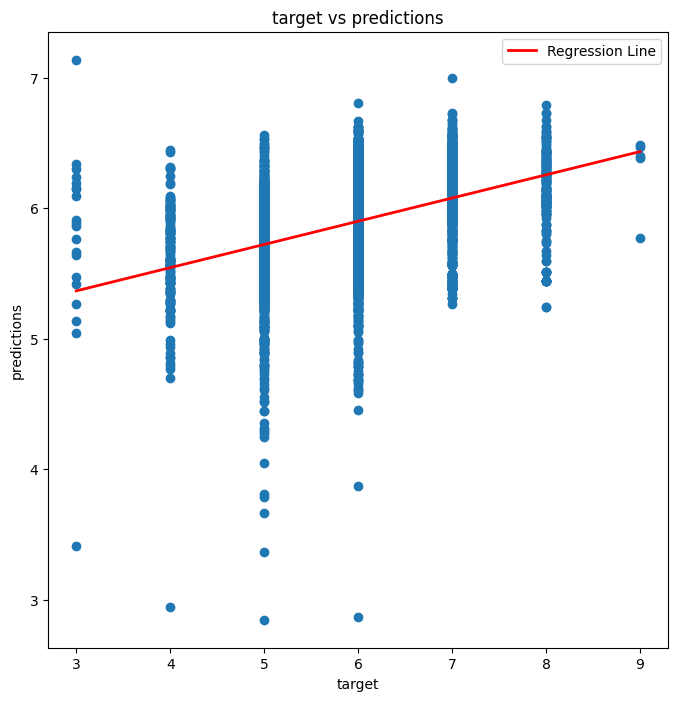

In [61]:
# plotting the model predictions vs the actual target values
plt.figure(figsize=(8,8))
plt.scatter(target, predictions_pca_linear_model)
plt.title("target vs predictions")
plt.xlabel("target")
plt.ylabel("predictions")

# adding the regression line from the model to the figure
m, b = np.polyfit(target, predictions_pca_linear_model, 1)
line_x = np.linspace(target.min(), target.max(), 200)
line_y = m * line_x + b
plt.plot(line_x, line_y, color="red", linewidth=2, label="Regression Line")
plt.legend()

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE

# finding the correlation between columns 
corr = input_cols.corr()

# filling the diagonal with nan to get rid of correlations between a column and itself
np.fill_diagonal(corr.values, np.nan)

# finding the max values from the matrix
corr_matrix_maxs = pd.DataFrame(corr.max()).reset_index().rename(columns={"index": "column", 0: "max_corr"})
corr_matrix_maxs

,column,max_corr
0,fixed acidity,0.289181
1,volatile acidity,0.089261
2,citric acid,0.289181
3,residual sugar,0.838966
4,chlorides,0.257211
5,free sulfur dioxide,0.615501
6,total sulfur dioxide,0.615501
7,density,0.838966
8,pH,0.155951
9,sulphates,0.155951


### Input Columns with the Highest Correlation

The input columns with the highest correlation are residual sugar and density. This correlation is reflected in the first principal component (PC1). PC1 shows the strongest positive movement with residual sugar (0.43) and density (0.51), which is expected since the variables are highly positively correlated and create a substantial amount of the overall variance. PCA therefore aligns its first component along this dominant direction of variability. 

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

### Explanation of Outlier Identification

The density outlier was first noticed during the analysis for Problems 3 and 4. When the density feature was visualized using histograms and boxplots, the graphs appeared heavily right-skewed and showed an unusually large separation from the main cluster of data points. This behavior suggested the presence of an extreme value. For the purpose of more clear visualization in earlier problems, this outlier was temporarily hidden, but it is revisited here for formal identification.

In [35]:
# locating the outlier row in the dataframe for index value 
wine_data.query("density > 1.02")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


In [36]:
# capturing the outliers density value
outlier_density = wine_data.loc[2781, "density"]

# calculating the mean of the density column
density_mean = wine_data["density"].mean()

# calculating the standard deviation of the density column
density_std = wine_data["density"].std()

# calculating the z-score of the outlier
zscore = (outlier_density - density_mean) / density_std
print(f"Z-Score: {zscore:.2f}")

Z-Score: 15.03


### Explanation for the use of Z-Score

Z-Score is most effective when used on distributions that are approximately normal. Since the density distribution closely follows a normal shape, the Z-Score method was chosen to prove the samples status as an outlier. A typical Z-Score ranges from -2 to 2. The density outlier in this dataset had a Z-score of 15.03, which places it far beyond the expected range and identifies it as not just an outlier, but an extreme outlier.

Text(0, 0.5, 'density (g/L)')

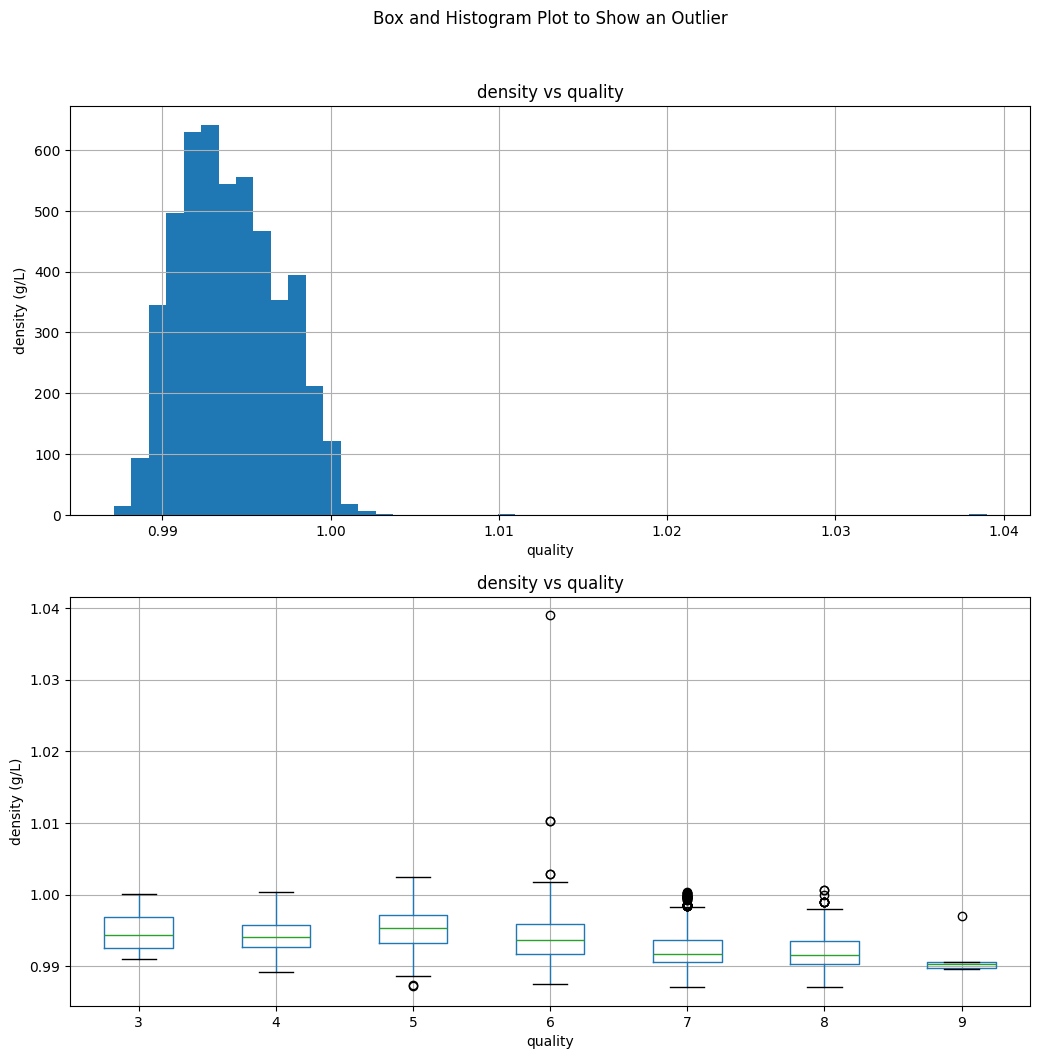

In [37]:
# YOUR CODE HERE

density_data = wine_data["density"]

# creates a dataframe for easy use of pandas boxplot function
df2 = pd.DataFrame({"x": wine_data["quality"], "y":density_data })

# creates a figure for 2 subplots
fig, ax = plt.subplots(2,1, figsize=(12,12))

# creates a histrogram of the density data to visualize the outlier found
ax[0].hist(density_data, bins=50)
ax[0].set_title("density vs quality")
ax[0].set_xlabel("quality")
ax[0].set_ylabel("density (g/L)")
ax[0].grid(True)

# creates a boxplot of the density data to visualize the outlier found 
df2.boxplot(column='y', by='x', ax=ax[1])
ax[1].figure.suptitle("Box and Histogram Plot to Show an Outlier")
ax[1].set_title("density vs quality")
ax[1].set_xlabel("quality")
ax[1].set_ylabel("density (g/L)")

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE